<a href="https://colab.research.google.com/github/El-47/fgc/blob/master/fgc_final_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.9MB/s]


In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IuYv6KOKs5p62rFSLvGa")
project = rf.workspace("muhammadmoin-y1qrz").project("retail-store-axhqk")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Retail-Store-1 in yolov8:: 100%|██████████| 2138/2138 [00:00<00:00, 4555.05it/s]


In [ ]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 233MB/s]
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Retail-Store-1/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1729419790.deb981d76c07.1567.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch270.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch271.jpg	weights
P_curve.png					    train_batch272.jpg
PR_curve.png					    train_batch2.jpg


/content


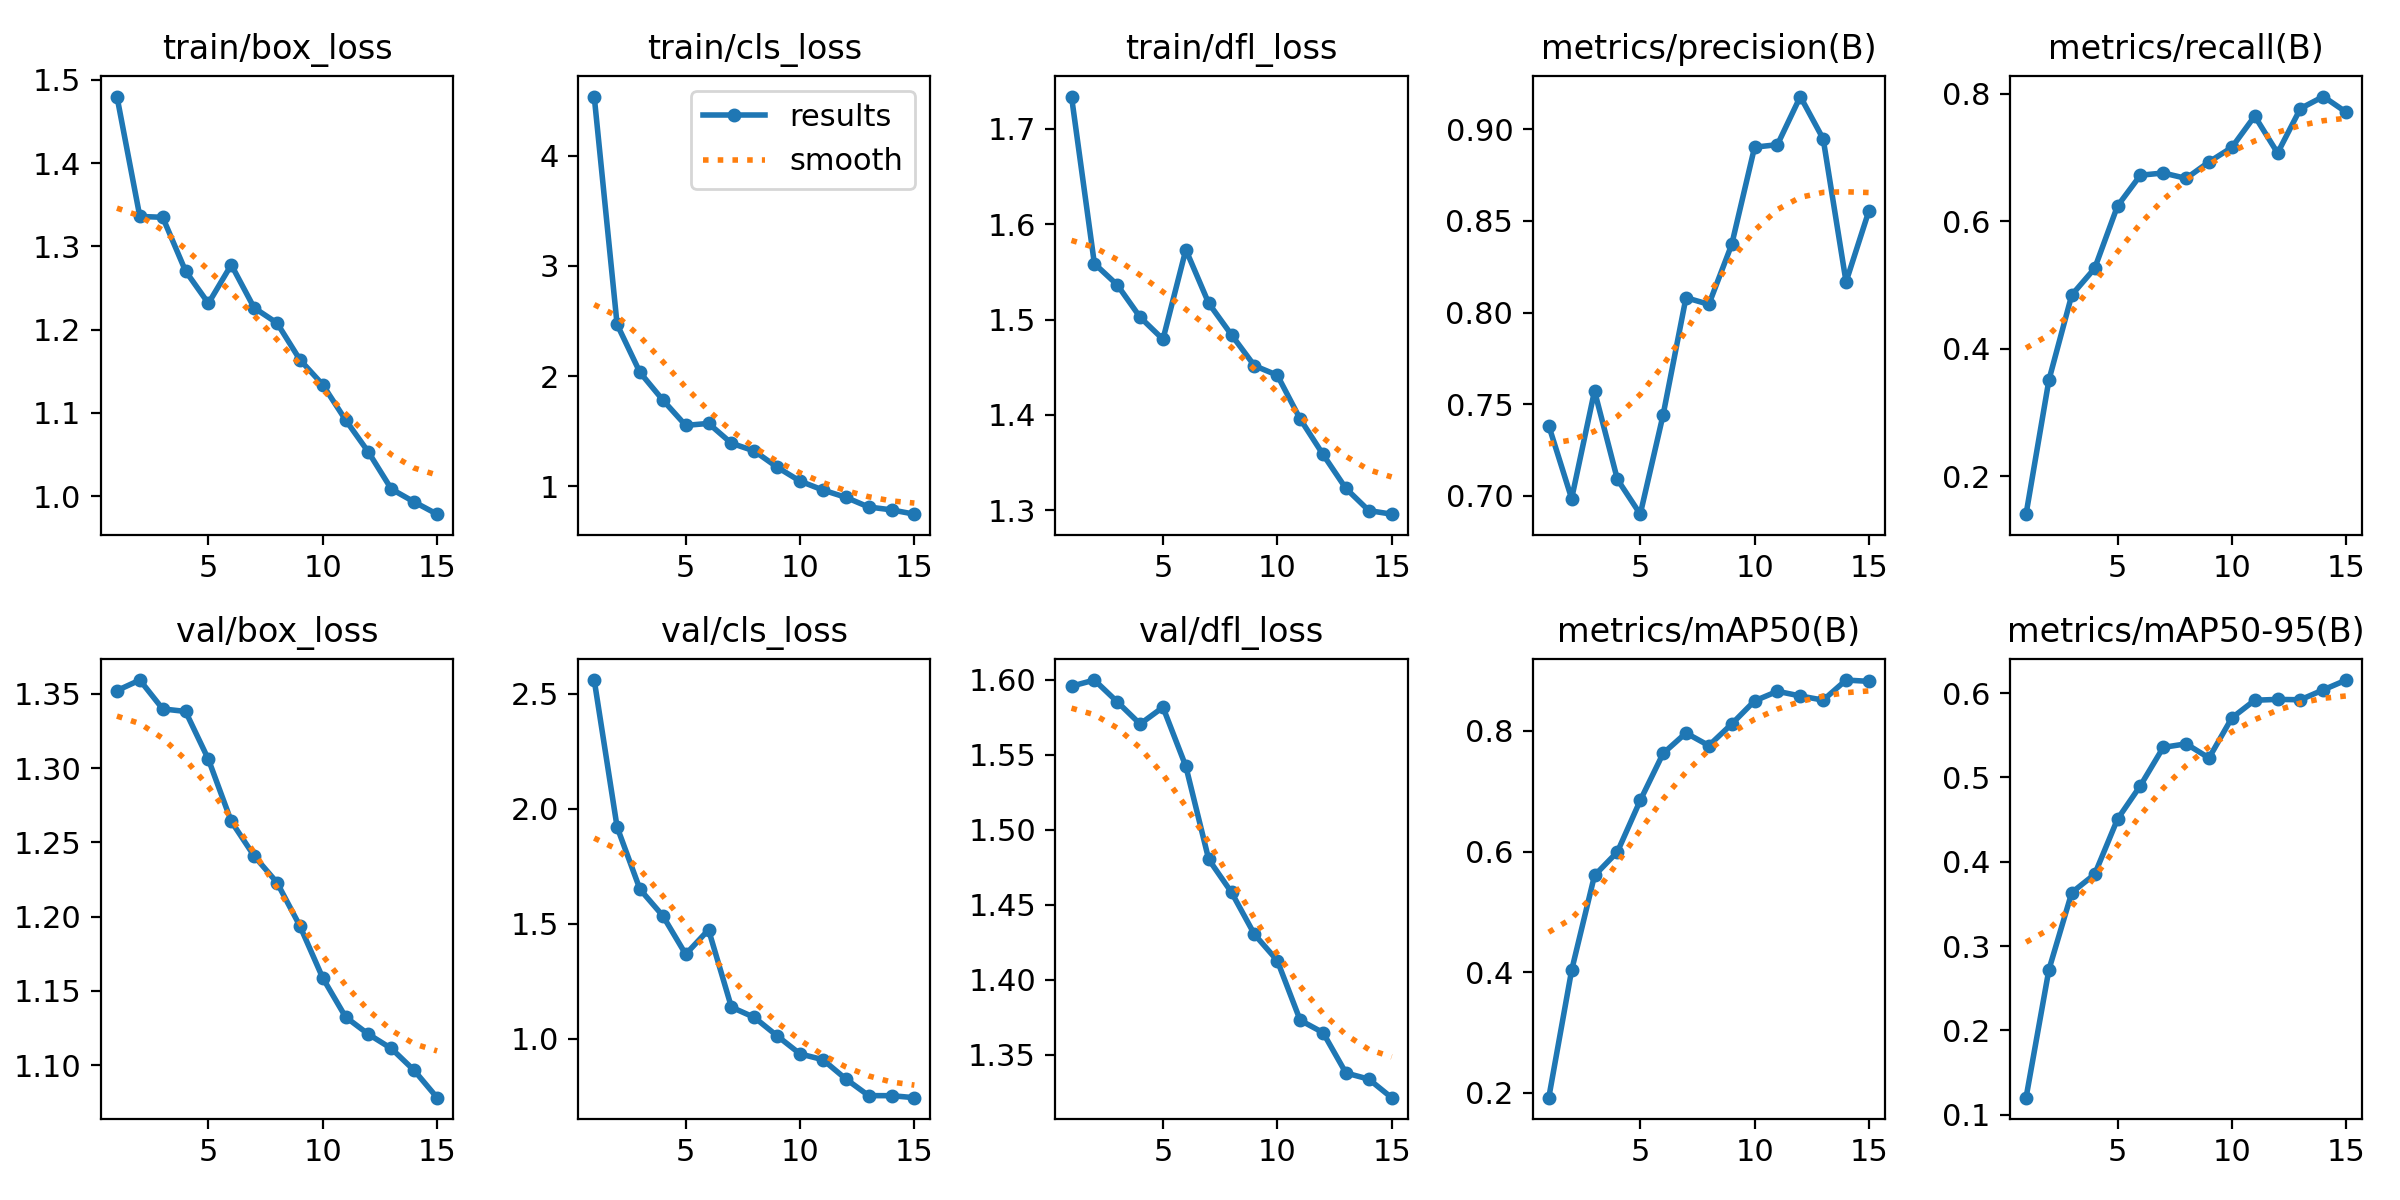

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


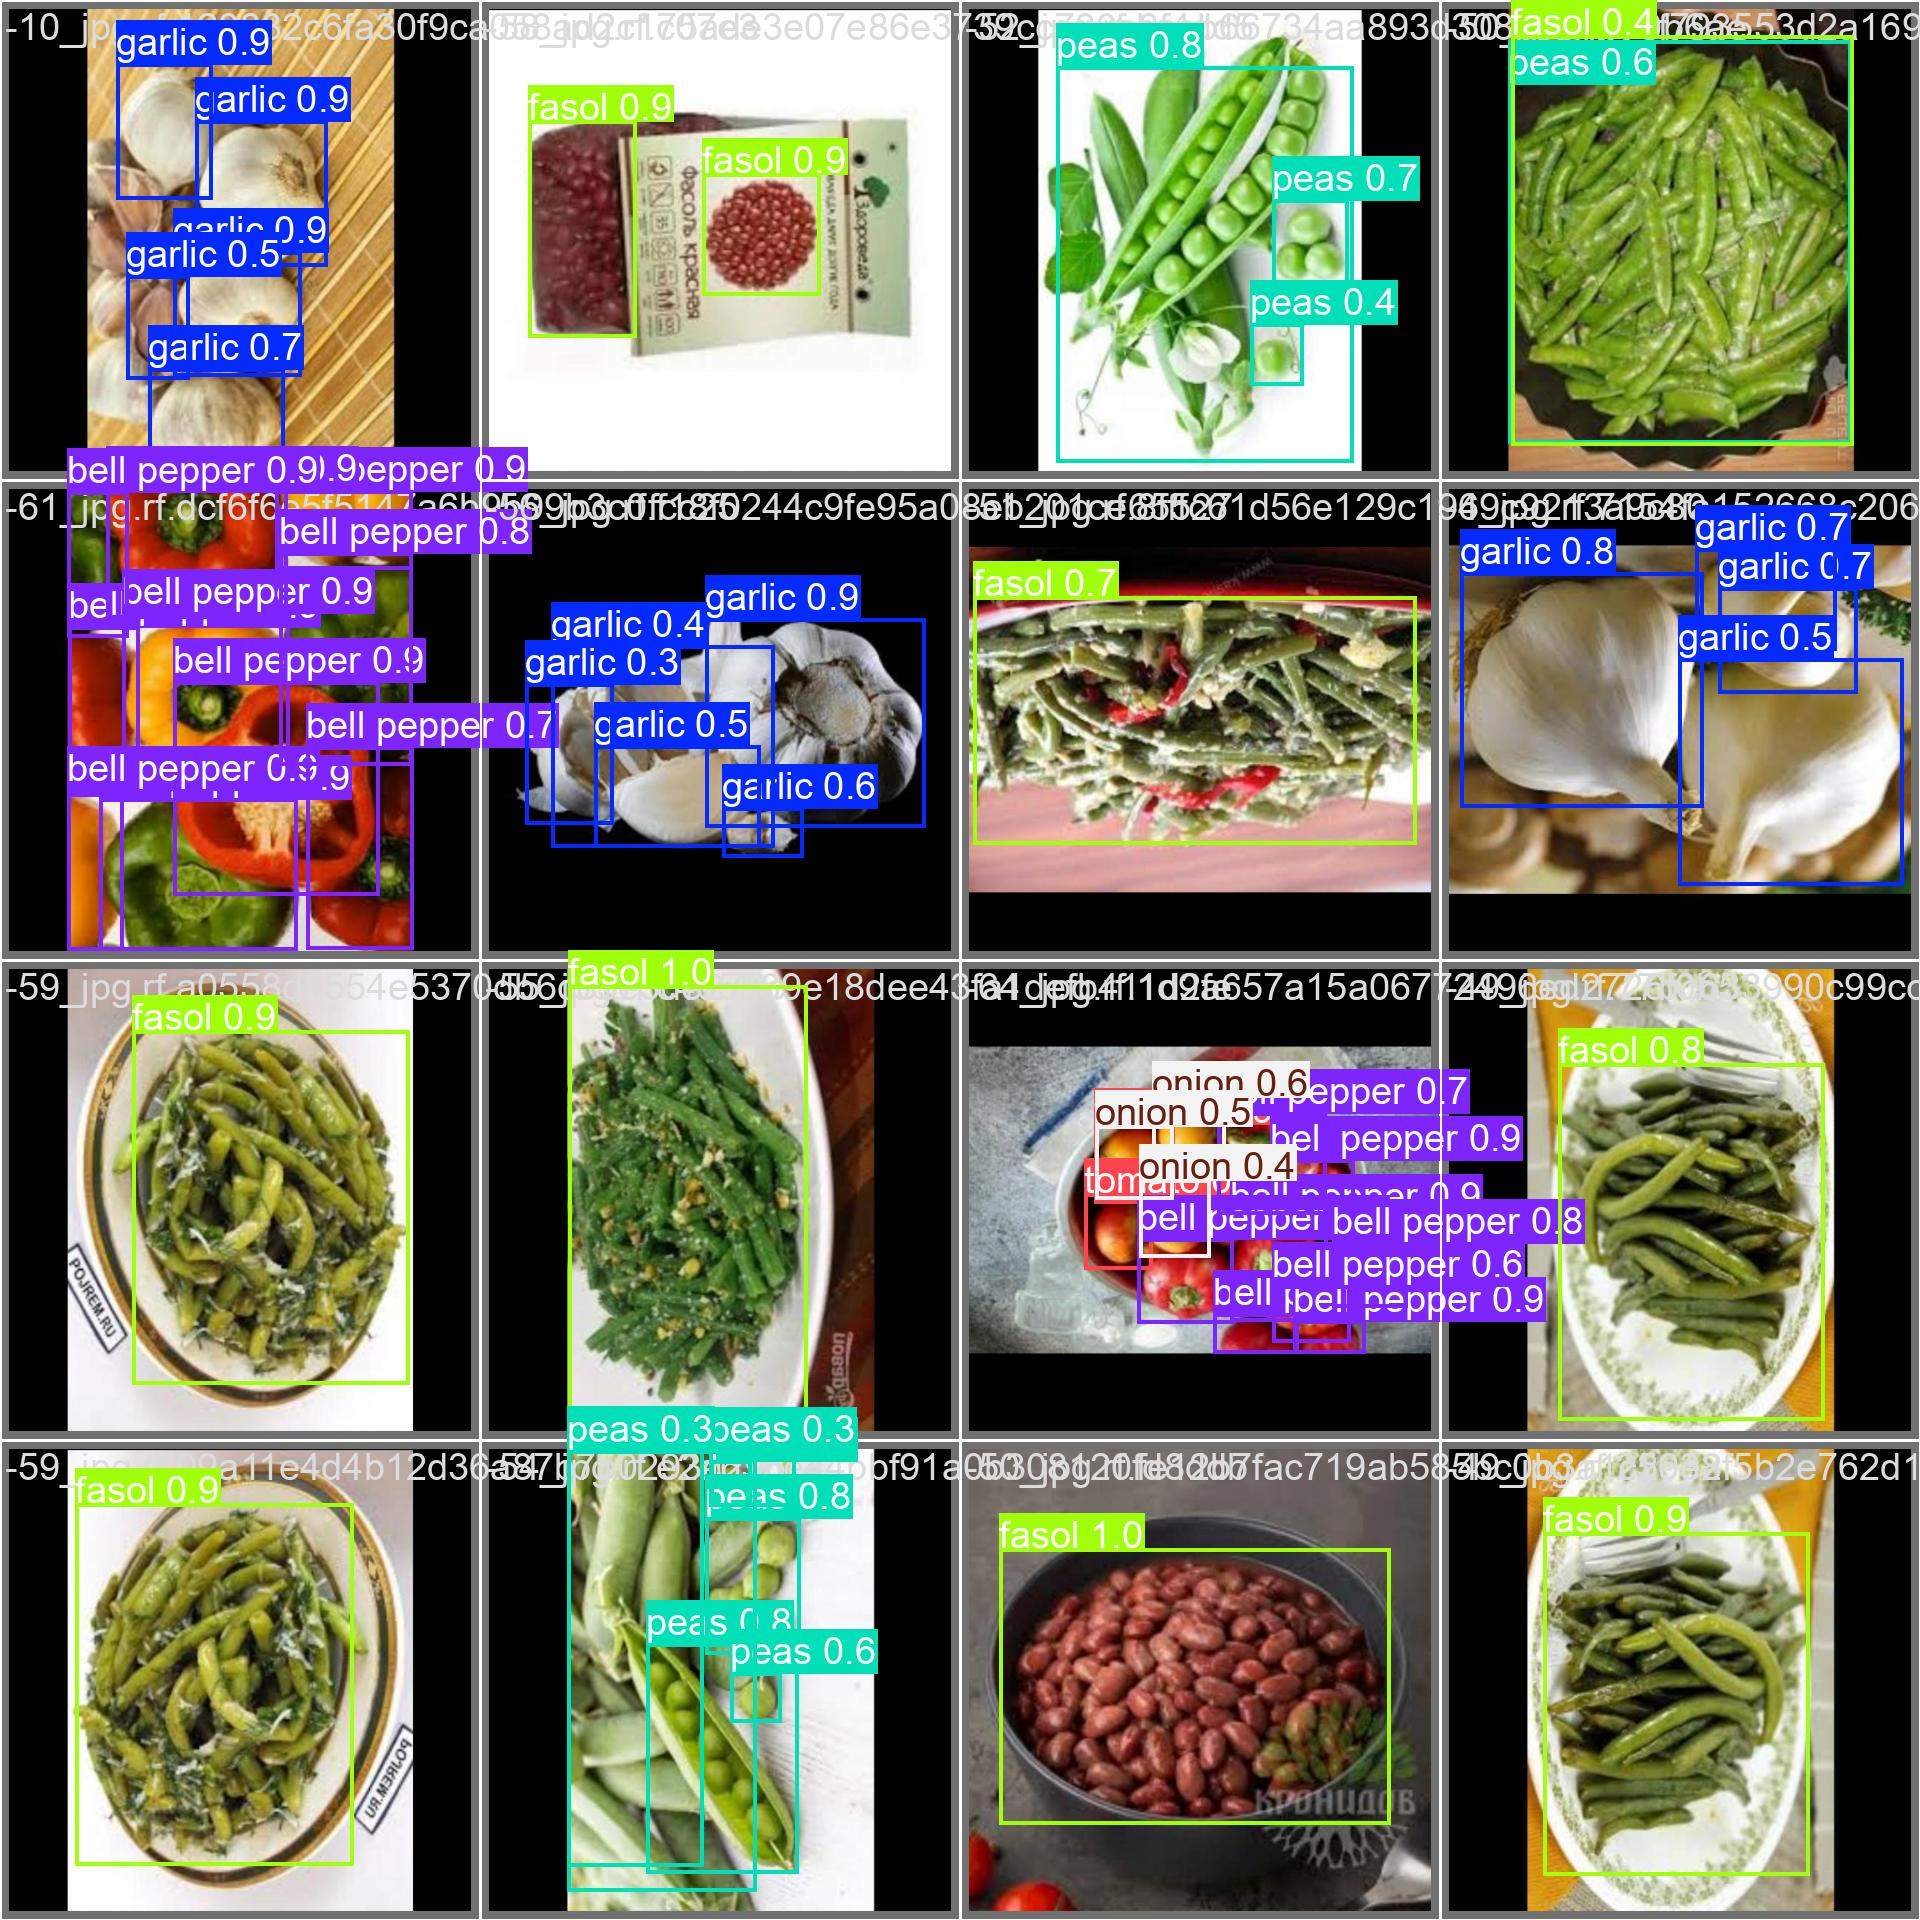

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,136,033 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Retail-Store-1/valid/labels.cache... 96 images, 0 backgrounds, 0 corrupt: 100% 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:05<00:00,  1.13it/s]
                   all         96        390      0.855      0.771      0.882      0.615
                Apples          4          4          1      0.677      0.995      0.649
                   Bun          4          7      0.954          1      0.995      0.499
               Cabbage          2          2      0.738          1      0.995      0.749
            Cold Drink          1          1          1          0     0.0995     0.0275
             Dry Fruit          1          1          1          0      0.995      0.398
                  Eggs          1 

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,136,033 parameters, 0 gradients, 28.5 GFLOPs

image 1/111 /content/datasets/Retail-Store-1/test/images/-10_jpg.rf.615cf8b0a17999d0092f69280a51da03.jpg: 800x800 7 garlics, 23.0ms
image 2/111 /content/datasets/Retail-Store-1/test/images/-11_jpg.rf.80671bda8eacbd17b103ba4af0cc0199.jpg: 800x800 5 onions, 23.0ms
image 3/111 /content/datasets/Retail-Store-1/test/images/-11_jpg.rf.b9d9e5829f524ccb1e197fbe937793a5.jpg: 800x800 1 bell pepper, 1 onion, 23.0ms
image 4/111 /content/datasets/Retail-Store-1/test/images/-13_jpg.rf.850ef84f30dcf451e5b7974f19a07b14.jpg: 800x800 5 onions, 23.0ms
image 5/111 /content/datasets/Retail-Store-1/test/images/-14_jpg.rf.38ab548b652a1ee23065a4b59fcef577.jpg: 800x800 3 bell peppers, 22.9ms
image 6/111 /content/datasets/Retail-Store-1/test/images/-14_jpg.rf.3a7b2b9e7399d83a442f345974d06806.jpg: 800x800 (no detections), 22.9ms
image 7/111

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru
!pip install -q lapx
!pip install -q thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
cd ..

/content


In [ ]:
!gdown "https://drive.google.com/uc?export=download&id=17Lg2AQwH47CzP8Z4IxzYfDEwJHWEfUsL"

Downloading...
From: https://drive.google.com/uc?export=download&id=17Lg2AQwH47CzP8Z4IxzYfDEwJHWEfUsL
To: /content/g123.mp4
100% 36.1M/36.1M [00:00<00:00, 197MB/s]


In [ ]:
SOURCE_VIDEO_PATH = f"/content/g123.mp4"

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [ ]:
# settings
MODEL = "/content/runs/detect/train/weights/best.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Model summary (fused): 168 layers, 11,136,033 parameters, 0 gradients, 28.5 GFLOPs


In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

In [ ]:
# settings


OUTPUT_VIDEO_PATH = f"{HOME}/g123_result.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=960, height=540, fps=30, total_frames=945)

In [ ]:
if not hasattr(np, 'float'):
    np.float = float


In [ ]:
import cv2
from tqdm import tqdm

In [ ]:
# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_capture = cv2.VideoCapture(SOURCE_VIDEO_PATH)
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
# create instance of BoxAnnotator and LineCounterAnnotator
color_palette = ColorPalette()
box_annotator = BoxAnnotator(color=color_palette)

# Frame generator
def get_video_frames_generator(video_capture):
    while True:
        ret, frame = video_capture.read()
        if not ret:
            break
        yield frame
    video_capture.release()

generator = get_video_frames_generator(video_capture)



# Initialize a set to store unique tracker IDs
unique_tracker_ids = set()

# open target video file
with VideoSink(OUTPUT_VIDEO_PATH, video_info) as sink:
    # Process each frame
    for frame in tqdm(generator, total=video_info.total_frames):
        # YOLO model prediction on the current frame
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )

        # Tracking detected objects
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )

        # Match detections with tracks and get tracker IDs
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)

        # Filter out detections without a tracker
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)

        # Update the unique tracker IDs
        unique_tracker_ids.update(detections.tracker_id[detections.tracker_id != -1])

        # Reset the object count for each frame
        frame_object_counts = {class_name: 0 for class_name in model.model.names.values()}

        # Update object counts for the current frame
        for class_id in detections.class_id:
            class_name = model.model.names[class_id]
            frame_object_counts[class_name] += 1

        # Annotate and save frame
        labels = [
            f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id in detections
        ]
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

        # Display total unique tracker IDs on the frame
        total_unique_ids = len(unique_tracker_ids)
        cv2.putText(
            frame,
            f"Total Unique Products: {total_unique_ids}",
            (50, 50),  # Position of the text on the frame
            cv2.FONT_HERSHEY_SIMPLEX,
            1,  # Font scale
            (255, 255, 255),  # Color (white)
            2,  # Thickness
            cv2.LINE_AA
        )

        # Display object counts for this frame (e.g., 5 apples, 3 bottles)
        y_offset = 100  # Starting point for displaying object counts
        for class_name, count in frame_object_counts.items():
            if count > 0:  # Display only if objects of this class are detected
                cv2.putText(
                    frame,
                    f"{class_name}: {count}",
                    (50, y_offset),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,  # Font scale
                    (255, 255, 255),  # Color (white)
                    2,  # Thickness
                    cv2.LINE_AA
                )
                y_offset += 40  # Move the next count down

        sink.write_frame(frame)

# Final unique tracker IDs count
print(f"Total unique Products (objects): {len(unique_tracker_ids)}")

  0%|          | 0/945 [00:00<?, ?it/s]


0: 480x800 (no detections), 20.2ms
Speed: 4.5ms preprocess, 20.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 33.4ms
Speed: 17.6ms preprocess, 33.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


  0%|          | 2/945 [00:00<01:30, 10.46it/s]


0: 480x800 (no detections), 20.8ms
Speed: 4.4ms preprocess, 20.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 44.4ms
Speed: 4.1ms preprocess, 44.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)


  0%|          | 4/945 [00:00<01:17, 12.18it/s]


0: 480x800 (no detections), 26.3ms
Speed: 3.7ms preprocess, 26.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)


  1%|          | 6/945 [00:00<01:07, 13.90it/s]


0: 480x800 (no detections), 15.9ms
Speed: 3.9ms preprocess, 15.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 28.5ms
Speed: 3.9ms preprocess, 28.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)


  1%|          | 8/945 [00:00<01:02, 14.98it/s]


0: 480x800 (no detections), 35.2ms
Speed: 6.9ms preprocess, 35.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 39.7ms
Speed: 12.0ms preprocess, 39.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)


  1%|          | 10/945 [00:00<01:08, 13.65it/s]


0: 480x800 (no detections), 30.0ms
Speed: 3.7ms preprocess, 30.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 42.5ms
Speed: 4.4ms preprocess, 42.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  1%|▏         | 12/945 [00:00<01:13, 12.69it/s]


0: 480x800 1 Apples, 17.6ms
Speed: 11.8ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 20.9ms
Speed: 5.0ms preprocess, 20.9ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)


  1%|▏         | 14/945 [00:01<01:10, 13.21it/s]


0: 480x800 1 Apples, 44.4ms
Speed: 7.4ms preprocess, 44.4ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 48.0ms
Speed: 6.0ms preprocess, 48.0ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 800)


  2%|▏         | 16/945 [00:01<01:24, 10.93it/s]


0: 480x800 1 Apples, 47.9ms
Speed: 9.8ms preprocess, 47.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 51.6ms
Speed: 12.8ms preprocess, 51.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


  2%|▏         | 18/945 [00:01<01:36,  9.57it/s]


0: 480x800 1 Apples, 41.7ms
Speed: 6.7ms preprocess, 41.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 18.9ms
Speed: 10.0ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


  2%|▏         | 20/945 [00:01<01:29, 10.35it/s]


0: 480x800 1 Apples, 37.7ms
Speed: 3.6ms preprocess, 37.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 29.8ms
Speed: 7.8ms preprocess, 29.8ms inference, 7.7ms postprocess per image at shape (1, 3, 480, 800)


  2%|▏         | 22/945 [00:01<01:30, 10.19it/s]


0: 480x800 1 Apples, 25.1ms
Speed: 17.0ms preprocess, 25.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 24.3ms
Speed: 5.8ms preprocess, 24.3ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 800)


  3%|▎         | 24/945 [00:02<01:25, 10.76it/s]


0: 480x800 1 Apples, 36.6ms
Speed: 5.5ms preprocess, 36.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 28.2ms
Speed: 5.4ms preprocess, 28.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  3%|▎         | 26/945 [00:02<01:20, 11.36it/s]


0: 480x800 1 Apples, 17.7ms
Speed: 4.3ms preprocess, 17.7ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 21.3ms
Speed: 5.1ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  3%|▎         | 28/945 [00:02<01:16, 11.99it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 7.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 30.2ms
Speed: 12.8ms preprocess, 30.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  3%|▎         | 30/945 [00:02<01:19, 11.56it/s]


0: 480x800 1 Apples, 26.0ms
Speed: 9.6ms preprocess, 26.0ms inference, 7.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 32.4ms
Speed: 12.5ms preprocess, 32.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  3%|▎         | 32/945 [00:02<01:20, 11.29it/s]


0: 480x800 1 Apples, 24.2ms
Speed: 7.7ms preprocess, 24.2ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 22.9ms
Speed: 8.7ms preprocess, 22.9ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 800)


  4%|▎         | 34/945 [00:02<01:19, 11.39it/s]


0: 480x800 1 Apples, 1 Pineapple, 18.7ms
Speed: 10.3ms preprocess, 18.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 43.8ms
Speed: 3.8ms preprocess, 43.8ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 800)


  4%|▍         | 36/945 [00:03<01:31,  9.95it/s]


0: 480x800 1 Apples, 1 Pineapple, 21.7ms
Speed: 23.8ms preprocess, 21.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 47.3ms
Speed: 5.9ms preprocess, 47.3ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 800)


  4%|▍         | 38/945 [00:03<01:37,  9.28it/s]


0: 480x800 1 Apples, 1 Pineapple, 28.1ms
Speed: 10.9ms preprocess, 28.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 19.8ms
Speed: 9.2ms preprocess, 19.8ms inference, 7.9ms postprocess per image at shape (1, 3, 480, 800)


  4%|▍         | 40/945 [00:03<01:31,  9.94it/s]


0: 480x800 1 Apples, 1 Pineapple, 20.9ms
Speed: 6.2ms preprocess, 20.9ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 22.1ms
Speed: 11.2ms preprocess, 22.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  4%|▍         | 42/945 [00:03<01:26, 10.48it/s]


0: 480x800 1 Apples, 1 Pineapple, 20.5ms
Speed: 7.8ms preprocess, 20.5ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 21.5ms
Speed: 5.2ms preprocess, 21.5ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 800)


  5%|▍         | 44/945 [00:03<01:17, 11.56it/s]


0: 480x800 1 Apples, 1 Pineapple, 27.2ms
Speed: 7.7ms preprocess, 27.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 17.0ms
Speed: 4.8ms preprocess, 17.0ms inference, 6.3ms postprocess per image at shape (1, 3, 480, 800)


  5%|▍         | 46/945 [00:04<01:13, 12.17it/s]


0: 480x800 1 Apples, 1 Pineapple, 28.1ms
Speed: 7.5ms preprocess, 28.1ms inference, 5.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 29.9ms
Speed: 8.8ms preprocess, 29.9ms inference, 6.4ms postprocess per image at shape (1, 3, 480, 800)


  5%|▌         | 48/945 [00:04<01:14, 12.02it/s]


0: 480x800 1 Apples, 1 Pineapple, 1 peas, 41.3ms
Speed: 9.0ms preprocess, 41.3ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 800)


  5%|▌         | 50/945 [00:04<01:17, 11.55it/s]


0: 480x800 1 Apples, 1 Pineapple, 22.7ms
Speed: 4.9ms preprocess, 22.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


  6%|▌         | 52/945 [00:04<01:10, 12.59it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  6%|▌         | 54/945 [00:04<01:03, 13.97it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  6%|▌         | 56/945 [00:04<00:58, 15.14it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


  6%|▌         | 58/945 [00:04<00:56, 15.76it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.8ms
Speed: 3.7ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


  6%|▋         | 60/945 [00:04<00:54, 16.16it/s]


0: 480x800 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Pineapple, 17.4ms
Speed: 3.9ms preprocess, 17.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  7%|▋         | 62/945 [00:05<00:54, 16.24it/s]


0: 480x800 (no detections), 20.1ms
Speed: 6.8ms preprocess, 20.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 19.8ms
Speed: 6.3ms preprocess, 19.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


  7%|▋         | 64/945 [00:05<00:56, 15.67it/s]


0: 480x800 1 Apples, 1 Pineapple, 19.2ms
Speed: 6.0ms preprocess, 19.2ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  7%|▋         | 66/945 [00:05<00:55, 15.87it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 11.1ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  7%|▋         | 68/945 [00:05<00:53, 16.24it/s]


0: 480x800 1 Apples, 1 Pineapple, 20.5ms
Speed: 3.9ms preprocess, 20.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


  7%|▋         | 70/945 [00:05<00:52, 16.65it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 27.9ms
Speed: 5.8ms preprocess, 27.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


  8%|▊         | 72/945 [00:05<00:52, 16.68it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 28.5ms
Speed: 8.3ms preprocess, 28.5ms inference, 12.2ms postprocess per image at shape (1, 3, 480, 800)


  8%|▊         | 74/945 [00:05<01:00, 14.51it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 16.7ms
Speed: 7.5ms preprocess, 16.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  8%|▊         | 76/945 [00:06<00:55, 15.52it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 5.6ms preprocess, 15.7ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 6.0ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


  8%|▊         | 78/945 [00:06<00:54, 16.05it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.5ms
Speed: 5.1ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 36.2ms
Speed: 14.2ms preprocess, 36.2ms inference, 8.4ms postprocess per image at shape (1, 3, 480, 800)


  8%|▊         | 80/945 [00:06<00:58, 14.71it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.9ms
Speed: 5.6ms preprocess, 16.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 3.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 800)


  9%|▉         | 83/945 [00:06<00:51, 16.84it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 27.1ms
Speed: 5.0ms preprocess, 27.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


  9%|▉         | 85/945 [00:06<00:53, 16.16it/s]


0: 480x800 1 Apples, 1 Pineapple, 20.0ms
Speed: 5.0ms preprocess, 20.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


  9%|▉         | 87/945 [00:06<00:50, 17.03it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.3ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 11.3ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 10%|▉         | 90/945 [00:06<00:47, 17.87it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


 10%|▉         | 93/945 [00:06<00:45, 18.73it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 21.3ms
Speed: 3.8ms preprocess, 21.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 10%|█         | 95/945 [00:07<00:45, 18.52it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 18.7ms
Speed: 6.1ms preprocess, 18.7ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 20.3ms
Speed: 5.5ms preprocess, 20.3ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)


 10%|█         | 97/945 [00:07<00:50, 16.78it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 20.2ms
Speed: 5.5ms preprocess, 20.2ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.8ms
Speed: 6.4ms preprocess, 15.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)


 10%|█         | 99/945 [00:07<00:53, 15.95it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 6.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 11%|█         | 101/945 [00:07<00:51, 16.51it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 20.5ms
Speed: 3.6ms preprocess, 20.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 21.0ms
Speed: 3.6ms preprocess, 21.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 11%|█         | 103/945 [00:07<00:57, 14.77it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 20.6ms
Speed: 5.7ms preprocess, 20.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 11%|█         | 105/945 [00:07<01:00, 13.93it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 41.0ms
Speed: 6.4ms preprocess, 41.0ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 11%|█▏        | 107/945 [00:07<01:04, 12.97it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 23.5ms
Speed: 3.7ms preprocess, 23.5ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 31.2ms
Speed: 4.1ms preprocess, 31.2ms inference, 8.9ms postprocess per image at shape (1, 3, 480, 800)


 12%|█▏        | 109/945 [00:08<01:04, 12.92it/s]


0: 480x800 1 Apples, 1 Pineapple, 18.4ms
Speed: 5.3ms preprocess, 18.4ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 37.3ms
Speed: 26.7ms preprocess, 37.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 12%|█▏        | 111/945 [00:08<01:20, 10.32it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 26.2ms
Speed: 3.9ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 18.8ms
Speed: 7.2ms preprocess, 18.8ms inference, 9.0ms postprocess per image at shape (1, 3, 480, 800)


 12%|█▏        | 113/945 [00:08<01:15, 11.03it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 19.5ms
Speed: 3.8ms preprocess, 19.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 25.1ms
Speed: 3.8ms preprocess, 25.1ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 12%|█▏        | 115/945 [00:08<01:08, 12.19it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 10.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 12%|█▏        | 117/945 [00:08<01:02, 13.20it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 31.3ms
Speed: 3.7ms preprocess, 31.3ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)


 13%|█▎        | 119/945 [00:08<01:02, 13.16it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 1 fasol, 17.5ms
Speed: 9.1ms preprocess, 17.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 13%|█▎        | 121/945 [00:09<01:01, 13.44it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 33.5ms
Speed: 14.7ms preprocess, 33.5ms inference, 13.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 30.3ms
Speed: 4.0ms preprocess, 30.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 13%|█▎        | 123/945 [00:09<01:10, 11.72it/s]


0: 480x800 1 Apples, 2 Milks, 1 Pineapple, 17.4ms
Speed: 3.6ms preprocess, 17.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 19.2ms
Speed: 10.8ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 13%|█▎        | 125/945 [00:09<01:04, 12.77it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 17.3ms
Speed: 4.1ms preprocess, 17.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 800)


 13%|█▎        | 127/945 [00:09<00:58, 14.07it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 16.5ms
Speed: 5.4ms preprocess, 16.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 14%|█▎        | 129/945 [00:09<00:55, 14.67it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 39.9ms
Speed: 3.8ms preprocess, 39.9ms inference, 19.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 41.2ms
Speed: 10.8ms preprocess, 41.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 14%|█▍        | 131/945 [00:09<01:05, 12.36it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 49.7ms
Speed: 19.8ms preprocess, 49.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 20.2ms
Speed: 3.7ms preprocess, 20.2ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 800)


 14%|█▍        | 133/945 [00:10<01:09, 11.74it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 35.8ms
Speed: 5.1ms preprocess, 35.8ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 800)


 14%|█▍        | 135/945 [00:10<01:05, 12.46it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 18.0ms
Speed: 13.0ms preprocess, 18.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 14%|█▍        | 137/945 [00:10<01:02, 13.01it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 2.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.2ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 15%|█▍        | 140/945 [00:10<00:49, 16.21it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 15%|█▌        | 143/945 [00:10<00:43, 18.51it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 2.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 2.5ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 15%|█▌        | 146/945 [00:10<00:39, 20.40it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 16%|█▌        | 149/945 [00:10<00:36, 21.78it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 3.7ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 4.4ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 16%|█▌        | 152/945 [00:10<00:34, 22.82it/s]


0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 3.6ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.9ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 6.2ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 16%|█▋        | 155/945 [00:11<00:33, 23.69it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 4.3ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 3.8ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.2ms
Speed: 3.8ms preprocess, 15.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 17%|█▋        | 158/945 [00:11<00:32, 23.86it/s]


0: 480x800 1 Apples, 1 Pineapple, 18.9ms
Speed: 4.1ms preprocess, 18.9ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 14.9ms
Speed: 5.6ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 3.2ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 17%|█▋        | 161/945 [00:11<00:33, 23.42it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.7ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 17.6ms
Speed: 4.1ms preprocess, 17.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 17%|█▋        | 164/945 [00:11<00:32, 23.68it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 5.2ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.9ms
Speed: 4.0ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.8ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 18%|█▊        | 167/945 [00:11<00:33, 23.46it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 5.0ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 4.7ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 3.2ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 18%|█▊        | 170/945 [00:11<00:32, 23.63it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.5ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 4.3ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 4.5ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 18%|█▊        | 173/945 [00:11<00:31, 24.53it/s]


0: 480x800 1 Apples, 14.7ms
Speed: 5.7ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 14.7ms
Speed: 3.4ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 14.7ms
Speed: 5.3ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 19%|█▊        | 176/945 [00:11<00:30, 24.82it/s]


0: 480x800 1 Apples, 14.7ms
Speed: 4.2ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.5ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 14.7ms
Speed: 4.2ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 19%|█▉        | 179/945 [00:12<00:30, 24.87it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 14.8ms
Speed: 5.2ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 14.7ms
Speed: 5.7ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 14.7ms
Speed: 3.5ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 19%|█▉        | 182/945 [00:12<00:30, 24.90it/s]


0: 480x800 1 Apples, 1 Milk, 1 tin, 14.7ms
Speed: 3.1ms preprocess, 14.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 tin, 15.2ms
Speed: 3.5ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 1 tin, 14.7ms
Speed: 4.9ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 20%|█▉        | 185/945 [00:12<00:31, 23.90it/s]


0: 480x800 1 Apples, 1 Pineapple, 14.7ms
Speed: 3.6ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 3.7ms preprocess, 14.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.8ms
Speed: 3.5ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 20%|█▉        | 188/945 [00:12<00:30, 24.45it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 14.9ms
Speed: 4.1ms preprocess, 14.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 14.7ms
Speed: 3.8ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 14.6ms
Speed: 2.7ms preprocess, 14.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 20%|██        | 191/945 [00:12<00:30, 24.60it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 14.7ms
Speed: 4.3ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 14.7ms
Speed: 2.5ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 14.7ms
Speed: 3.2ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 21%|██        | 194/945 [00:12<00:30, 24.83it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.0ms
Speed: 3.4ms preprocess, 15.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.0ms
Speed: 5.5ms preprocess, 15.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 14.9ms
Speed: 6.6ms preprocess, 14.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 21%|██        | 197/945 [00:12<00:30, 24.93it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.0ms
Speed: 4.5ms preprocess, 15.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.2ms
Speed: 3.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 21%|██        | 200/945 [00:12<00:29, 24.86it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 21%|██▏       | 203/945 [00:13<00:29, 24.99it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.2ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 5.1ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 22%|██▏       | 206/945 [00:13<00:30, 24.37it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 6.1ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.4ms
Speed: 6.2ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 1 peas, 15.3ms
Speed: 4.2ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 22%|██▏       | 209/945 [00:13<00:31, 23.17it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 17.2ms
Speed: 6.0ms preprocess, 17.2ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.4ms
Speed: 5.6ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 4.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 22%|██▏       | 212/945 [00:13<00:32, 22.30it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.5ms
Speed: 3.6ms preprocess, 15.5ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 23%|██▎       | 215/945 [00:13<00:32, 22.64it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 23%|██▎       | 218/945 [00:13<00:31, 23.41it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.8ms
Speed: 5.0ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 3.2ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 23%|██▎       | 221/945 [00:13<00:30, 23.60it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 16.1ms
Speed: 3.8ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 24%|██▎       | 224/945 [00:13<00:30, 24.02it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 2.7ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 24%|██▍       | 227/945 [00:14<00:29, 24.25it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 24%|██▍       | 230/945 [00:14<00:29, 24.05it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.9ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 25%|██▍       | 233/945 [00:14<00:29, 24.13it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 16.2ms
Speed: 4.6ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 25%|██▍       | 236/945 [00:14<00:30, 23.60it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.3ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 800)


 25%|██▌       | 239/945 [00:14<00:31, 22.38it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 5.2ms preprocess, 15.7ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 3 Pineapples, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 3 Pineapples, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 26%|██▌       | 242/945 [00:14<00:30, 22.80it/s]


0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 15.7ms
Speed: 5.6ms preprocess, 15.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 15.7ms
Speed: 5.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 26%|██▌       | 245/945 [00:14<00:31, 22.30it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 26%|██▌       | 248/945 [00:15<00:30, 22.57it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 16.1ms
Speed: 3.7ms preprocess, 16.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 27%|██▋       | 251/945 [00:15<00:30, 22.89it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Buns, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 27%|██▋       | 254/945 [00:15<00:29, 23.53it/s]


0: 480x800 1 Apples, 1 Water Bottle, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 27%|██▋       | 257/945 [00:15<00:29, 23.71it/s]


0: 480x800 1 Apples, 2 Water Bottles, 16.2ms
Speed: 4.7ms preprocess, 16.2ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 5.9ms preprocess, 15.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)


 28%|██▊       | 260/945 [00:15<00:30, 22.37it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 28%|██▊       | 263/945 [00:15<00:29, 22.83it/s]


0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 28%|██▊       | 266/945 [00:15<00:29, 23.13it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.0ms
Speed: 3.5ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 28%|██▊       | 269/945 [00:15<00:29, 23.21it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.4ms
Speed: 3.7ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 4.1ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 29%|██▉       | 272/945 [00:16<00:30, 22.31it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 17.7ms
Speed: 3.6ms preprocess, 17.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 29%|██▉       | 275/945 [00:16<00:32, 20.59it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.3ms
Speed: 3.7ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 5.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 19.3ms
Speed: 3.7ms preprocess, 19.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 29%|██▉       | 278/945 [00:16<00:33, 19.74it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 17.9ms
Speed: 3.6ms preprocess, 17.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 7.0ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 30%|██▉       | 281/945 [00:16<00:33, 19.58it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 30%|██▉       | 283/945 [00:16<00:33, 19.53it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 6.5ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 30%|███       | 285/945 [00:16<00:35, 18.75it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 4.4ms preprocess, 15.3ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 800)


 30%|███       | 287/945 [00:16<00:34, 18.89it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 17.1ms
Speed: 3.5ms preprocess, 17.1ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)


 31%|███       | 290/945 [00:17<00:34, 19.14it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 4.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 31%|███       | 292/945 [00:17<00:34, 19.04it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.9ms
Speed: 3.4ms preprocess, 16.9ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 31%|███       | 294/945 [00:17<00:33, 19.17it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 3 Pineapples, 2 Water Bottles, 16.7ms
Speed: 4.9ms preprocess, 16.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 31%|███▏      | 296/945 [00:17<00:34, 18.90it/s]


0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 20.0ms
Speed: 5.5ms preprocess, 20.0ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 18.8ms
Speed: 5.2ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 32%|███▏      | 298/945 [00:17<00:35, 18.21it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.1ms
Speed: 5.9ms preprocess, 16.1ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 16.2ms
Speed: 4.8ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 32%|███▏      | 300/945 [00:17<00:34, 18.51it/s]


0: 480x800 2 Water Bottles, 17.9ms
Speed: 3.6ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 32%|███▏      | 303/945 [00:17<00:32, 19.93it/s]


0: 480x800 (no detections), 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)


 32%|███▏      | 306/945 [00:17<00:30, 21.15it/s]


0: 480x800 (no detections), 16.4ms
Speed: 3.3ms preprocess, 16.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)


 33%|███▎      | 309/945 [00:17<00:29, 21.36it/s]


0: 480x800 (no detections), 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 18.2ms
Speed: 3.6ms preprocess, 18.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 800)


 33%|███▎      | 312/945 [00:18<00:29, 21.16it/s]


0: 480x800 (no detections), 18.1ms
Speed: 3.6ms preprocess, 18.1ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 (no detections), 18.2ms
Speed: 5.3ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.8ms
Speed: 4.9ms preprocess, 15.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


 33%|███▎      | 315/945 [00:18<00:29, 21.35it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 18.0ms
Speed: 5.5ms preprocess, 18.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 17.1ms
Speed: 3.6ms preprocess, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


 34%|███▎      | 318/945 [00:18<00:29, 21.05it/s]


0: 480x800 1 Apples, 16.8ms
Speed: 4.7ms preprocess, 16.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 17.2ms
Speed: 5.0ms preprocess, 17.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 34%|███▍      | 321/945 [00:18<00:29, 20.92it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 16.2ms
Speed: 4.0ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 34%|███▍      | 324/945 [00:18<00:29, 21.38it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 4.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 35%|███▍      | 327/945 [00:18<00:27, 22.73it/s]


0: 480x800 1 Apples, 15.6ms
Speed: 4.2ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 35%|███▍      | 330/945 [00:18<00:26, 23.63it/s]


0: 480x800 1 Apples, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.8ms
Speed: 3.7ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 35%|███▌      | 333/945 [00:19<00:25, 24.36it/s]


0: 480x800 1 Apples, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 36%|███▌      | 336/945 [00:19<00:24, 24.44it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.9ms
Speed: 5.8ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 36%|███▌      | 339/945 [00:19<00:25, 24.09it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 17.1ms
Speed: 4.7ms preprocess, 17.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 36%|███▌      | 342/945 [00:19<00:24, 24.27it/s]


0: 480x800 1 Apples, 1 Pineapple, 17.6ms
Speed: 3.5ms preprocess, 17.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.2ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 37%|███▋      | 345/945 [00:19<00:24, 24.27it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.9ms
Speed: 3.8ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 37%|███▋      | 348/945 [00:19<00:24, 24.26it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.8ms
Speed: 5.5ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 37%|███▋      | 351/945 [00:19<00:24, 24.07it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 2.4ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 37%|███▋      | 354/945 [00:19<00:24, 24.11it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 38%|███▊      | 357/945 [00:20<00:23, 24.52it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 17.2ms
Speed: 4.1ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 7.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 38%|███▊      | 360/945 [00:20<00:24, 23.82it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 16.0ms
Speed: 3.8ms preprocess, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 38%|███▊      | 363/945 [00:20<00:24, 23.58it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.8ms
Speed: 5.3ms preprocess, 15.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Pineapple, 15.6ms
Speed: 6.7ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Pineapple, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 39%|███▊      | 366/945 [00:20<00:25, 22.39it/s]


0: 480x800 (no detections), 15.9ms
Speed: 4.4ms preprocess, 15.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 6.2ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 16.4ms
Speed: 4.7ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 39%|███▉      | 369/945 [00:20<00:26, 22.15it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 39%|███▉      | 372/945 [00:20<00:25, 22.79it/s]


0: 480x800 1 Apples, 1 Pineapple, 17.1ms
Speed: 3.4ms preprocess, 17.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 40%|███▉      | 375/945 [00:20<00:24, 23.05it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 4.5ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 40%|████      | 378/945 [00:20<00:24, 23.43it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.2ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 40%|████      | 381/945 [00:21<00:23, 23.97it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 6.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.1ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 41%|████      | 384/945 [00:21<00:23, 23.52it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 18.9ms
Speed: 3.5ms preprocess, 18.9ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 41%|████      | 387/945 [00:21<00:23, 23.31it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 7.3ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)


 41%|████▏     | 390/945 [00:21<00:23, 23.15it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 42%|████▏     | 393/945 [00:21<00:23, 23.97it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.2ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 42%|████▏     | 396/945 [00:21<00:22, 24.67it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 42%|████▏     | 399/945 [00:21<00:22, 24.75it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 43%|████▎     | 402/945 [00:21<00:21, 24.70it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.1ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.2ms
Speed: 5.5ms preprocess, 15.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)


 43%|████▎     | 405/945 [00:22<00:21, 24.77it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 16.2ms
Speed: 5.6ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 7.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 7.3ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 43%|████▎     | 408/945 [00:22<00:22, 24.18it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.5ms
Speed: 3.6ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 16.3ms
Speed: 3.6ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 7.4ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 43%|████▎     | 411/945 [00:22<00:22, 23.85it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.2ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.9ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 6.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 44%|████▍     | 414/945 [00:22<00:22, 23.09it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.3ms
Speed: 4.4ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.1ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)


 44%|████▍     | 417/945 [00:22<00:22, 23.68it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.5ms
Speed: 4.9ms preprocess, 15.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)


 44%|████▍     | 420/945 [00:22<00:21, 24.32it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.5ms
Speed: 4.3ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.2ms
Speed: 4.2ms preprocess, 15.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 17.1ms
Speed: 3.5ms preprocess, 17.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 45%|████▍     | 423/945 [00:22<00:21, 24.09it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.2ms
Speed: 3.7ms preprocess, 15.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 1 fasol, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.3ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 45%|████▌     | 426/945 [00:22<00:21, 24.40it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 5.4ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Milks, 1 Pineapple, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.4ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 45%|████▌     | 429/945 [00:23<00:20, 24.70it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 16.0ms
Speed: 4.7ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 6.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 7.6ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 46%|████▌     | 432/945 [00:23<00:21, 23.50it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 6.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 46%|████▌     | 435/945 [00:23<00:22, 22.92it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 6.8ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 5.0ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 46%|████▋     | 438/945 [00:23<00:22, 22.88it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.6ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.5ms
Speed: 4.6ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 17.4ms
Speed: 4.2ms preprocess, 17.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 47%|████▋     | 441/945 [00:23<00:21, 23.42it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 47%|████▋     | 444/945 [00:23<00:21, 23.64it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 47%|████▋     | 447/945 [00:23<00:20, 23.76it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.5ms
Speed: 8.8ms preprocess, 15.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 48%|████▊     | 450/945 [00:23<00:20, 23.72it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.0ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 48%|████▊     | 453/945 [00:24<00:20, 23.67it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.2ms
Speed: 3.9ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 7.1ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 48%|████▊     | 456/945 [00:24<00:21, 22.95it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 16.0ms
Speed: 5.8ms preprocess, 16.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 49%|████▊     | 459/945 [00:24<00:21, 23.07it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 49%|████▉     | 462/945 [00:24<00:21, 22.27it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.0ms
Speed: 4.0ms preprocess, 16.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 49%|████▉     | 465/945 [00:24<00:21, 22.67it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.3ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.4ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 50%|████▉     | 468/945 [00:24<00:21, 22.54it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 19.1ms
Speed: 4.3ms preprocess, 19.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 50%|████▉     | 471/945 [00:24<00:21, 22.36it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.8ms
Speed: 3.7ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 50%|█████     | 474/945 [00:25<00:20, 22.92it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.6ms
Speed: 5.5ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 50%|█████     | 477/945 [00:25<00:20, 22.73it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 4.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 16.5ms
Speed: 3.6ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 15.7ms
Speed: 7.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 51%|█████     | 480/945 [00:25<00:20, 22.70it/s]


0: 480x800 1 Apples, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 1 tin, 15.8ms
Speed: 4.5ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 51%|█████     | 483/945 [00:25<00:20, 22.42it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 tin, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 tin, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 51%|█████▏    | 486/945 [00:25<00:19, 23.41it/s]


0: 480x800 1 Apples, 1 Milk, 1 tin, 15.5ms
Speed: 4.3ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 tin, 15.3ms
Speed: 5.9ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 1 tin, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 52%|█████▏    | 489/945 [00:25<00:19, 23.78it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.4ms
Speed: 4.8ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 52%|█████▏    | 492/945 [00:25<00:19, 23.63it/s]


0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 4.1ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 52%|█████▏    | 495/945 [00:25<00:19, 23.46it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 2 Pineapples, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 53%|█████▎    | 498/945 [00:26<00:18, 23.92it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 53%|█████▎    | 501/945 [00:26<00:19, 23.26it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 53%|█████▎    | 504/945 [00:26<00:19, 22.86it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 5.8ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 6.7ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 54%|█████▎    | 507/945 [00:26<00:19, 22.67it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 5.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 54%|█████▍    | 510/945 [00:26<00:18, 23.07it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 4.2ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 1 peas, 17.2ms
Speed: 3.6ms preprocess, 17.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 54%|█████▍    | 513/945 [00:26<00:18, 23.32it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 4.3ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 55%|█████▍    | 516/945 [00:26<00:18, 23.44it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 1 peas, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 55%|█████▍    | 519/945 [00:26<00:18, 23.45it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 16.7ms
Speed: 3.5ms preprocess, 16.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 55%|█████▌    | 522/945 [00:27<00:17, 23.84it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 56%|█████▌    | 525/945 [00:27<00:18, 23.19it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 15.4ms
Speed: 5.6ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 5.4ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 5.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 56%|█████▌    | 528/945 [00:27<00:18, 22.12it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 6.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 56%|█████▌    | 531/945 [00:27<00:18, 22.18it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 57%|█████▋    | 534/945 [00:27<00:17, 23.14it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 16.0ms
Speed: 3.7ms preprocess, 16.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 57%|█████▋    | 537/945 [00:27<00:17, 23.54it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.3ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 57%|█████▋    | 540/945 [00:27<00:17, 23.72it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.6ms
Speed: 4.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 57%|█████▋    | 543/945 [00:27<00:16, 23.91it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Pineapples, 15.4ms
Speed: 5.4ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 58%|█████▊    | 546/945 [00:28<00:16, 23.83it/s]


0: 480x800 1 Apples, 2 Pineapples, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 3 Pineapples, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 3 Pineapples, 16.0ms
Speed: 5.8ms preprocess, 16.0ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 58%|█████▊    | 549/945 [00:28<00:17, 23.26it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.3ms
Speed: 5.3ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.3ms
Speed: 5.8ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 58%|█████▊    | 552/945 [00:28<00:17, 22.54it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.4ms
Speed: 5.2ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 15.3ms
Speed: 4.1ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 59%|█████▊    | 555/945 [00:28<00:16, 23.04it/s]


0: 480x800 1 Apples, 1 Bun, 1 Milk, 1 Pineapple, 17.6ms
Speed: 7.4ms preprocess, 17.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.4ms
Speed: 5.3ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Buns, 1 Water Bottle, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 59%|█████▉    | 558/945 [00:28<00:16, 22.88it/s]


0: 480x800 1 Apples, 1 Water Bottle, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 15.4ms
Speed: 3.4ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.4ms
Speed: 4.7ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 59%|█████▉    | 561/945 [00:28<00:17, 22.49it/s]


0: 480x800 1 Apples, 2 Water Bottles, 16.2ms
Speed: 3.7ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 4.4ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 60%|█████▉    | 564/945 [00:28<00:17, 22.05it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 18.3ms
Speed: 4.5ms preprocess, 18.3ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 60%|██████    | 567/945 [00:29<00:17, 21.43it/s]


0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 16.2ms
Speed: 3.8ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 19.7ms
Speed: 5.0ms preprocess, 19.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.5ms
Speed: 6.7ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 60%|██████    | 570/945 [00:29<00:18, 20.07it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 18.9ms
Speed: 4.4ms preprocess, 18.9ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 6.0ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 61%|██████    | 573/945 [00:29<00:18, 20.23it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 61%|██████    | 576/945 [00:29<00:17, 20.63it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 61%|██████▏   | 579/945 [00:29<00:17, 20.88it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 62%|██████▏   | 582/945 [00:29<00:17, 21.13it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 62%|██████▏   | 585/945 [00:29<00:17, 21.15it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 19.5ms
Speed: 4.0ms preprocess, 19.5ms inference, 4.8ms postprocess per image at shape (1, 3, 480, 800)


 62%|██████▏   | 588/945 [00:30<00:17, 20.36it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 18.8ms
Speed: 3.4ms preprocess, 18.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 800)


 63%|██████▎   | 591/945 [00:30<00:17, 19.89it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 63%|██████▎   | 593/945 [00:30<00:17, 19.84it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 18.6ms
Speed: 3.6ms preprocess, 18.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 63%|██████▎   | 596/945 [00:30<00:17, 20.21it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 63%|██████▎   | 599/945 [00:30<00:16, 20.55it/s]


0: 480x800 2 Appless, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.6ms
Speed: 4.5ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 64%|██████▎   | 602/945 [00:30<00:16, 20.76it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Water Bottles, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 64%|██████▍   | 605/945 [00:30<00:16, 21.11it/s]


0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 64%|██████▍   | 608/945 [00:31<00:15, 21.96it/s]


0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 5.8ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


 65%|██████▍   | 611/945 [00:31<00:15, 21.83it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 16.0ms
Speed: 3.7ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)


 65%|██████▍   | 614/945 [00:31<00:15, 21.17it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.8ms
Speed: 4.6ms preprocess, 15.8ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.9ms
Speed: 5.5ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 65%|██████▌   | 617/945 [00:31<00:15, 20.60it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 66%|██████▌   | 620/945 [00:31<00:15, 20.72it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 16.4ms
Speed: 3.5ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 66%|██████▌   | 623/945 [00:31<00:15, 21.06it/s]


0: 480x800 2 Appless, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 5.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 66%|██████▌   | 626/945 [00:31<00:15, 20.78it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 3 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 4.3ms postprocess per image at shape (1, 3, 480, 800)


 67%|██████▋   | 629/945 [00:32<00:15, 20.39it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 3 Pineapples, 2 Water Bottles, 16.4ms
Speed: 3.8ms preprocess, 16.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 17.6ms
Speed: 4.7ms preprocess, 17.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 3 Pineapples, 2 Water Bottles, 18.6ms
Speed: 4.9ms preprocess, 18.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)


 67%|██████▋   | 632/945 [00:32<00:15, 19.83it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 16.0ms
Speed: 5.0ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 17.9ms
Speed: 4.8ms preprocess, 17.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 67%|██████▋   | 634/945 [00:32<00:16, 19.12it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 18.5ms
Speed: 3.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 20.3ms
Speed: 6.7ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 67%|██████▋   | 636/945 [00:32<00:17, 18.12it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 21.1ms
Speed: 8.5ms preprocess, 21.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 68%|██████▊   | 638/945 [00:32<00:17, 17.94it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 17.8ms
Speed: 3.8ms preprocess, 17.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 18.3ms
Speed: 5.3ms preprocess, 18.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 68%|██████▊   | 640/945 [00:32<00:17, 17.42it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 16.4ms
Speed: 5.4ms preprocess, 16.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 5.6ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 68%|██████▊   | 642/945 [00:32<00:16, 17.93it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 17.5ms
Speed: 3.4ms preprocess, 17.5ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)


 68%|██████▊   | 645/945 [00:32<00:16, 18.61it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 68%|██████▊   | 647/945 [00:33<00:16, 18.32it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 21.6ms
Speed: 7.5ms preprocess, 21.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 1 Water Bottle, 15.7ms
Speed: 6.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 69%|██████▊   | 649/945 [00:33<00:16, 17.99it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 1 Water Bottle, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 3 Pineapples, 1 Water Bottle, 15.7ms
Speed: 5.4ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 69%|██████▉   | 652/945 [00:33<00:15, 18.95it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 16.0ms
Speed: 5.9ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 69%|██████▉   | 654/945 [00:33<00:15, 19.07it/s]


0: 480x800 1 Apples, 1 Pineapple, 22.3ms
Speed: 4.1ms preprocess, 22.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 18.2ms
Speed: 4.4ms preprocess, 18.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 69%|██████▉   | 656/945 [00:33<00:15, 18.57it/s]


0: 480x800 1 Apples, 1 Pineapple, 16.3ms
Speed: 4.8ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Pineapples, 2 Water Bottles, 16.5ms
Speed: 3.4ms preprocess, 16.5ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 70%|██████▉   | 658/945 [00:33<00:15, 18.45it/s]


0: 480x800 1 Apples, 2 Pineapples, 1 Water Bottle, 17.9ms
Speed: 3.4ms preprocess, 17.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 17.5ms
Speed: 3.7ms preprocess, 17.5ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)


 70%|██████▉   | 660/945 [00:33<00:15, 18.55it/s]


0: 480x800 1 Apples, 2 Pineapples, 1 Water Bottle, 15.7ms
Speed: 5.5ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 70%|███████   | 663/945 [00:33<00:14, 19.50it/s]


0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 15.8ms
Speed: 4.6ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 1 Water Bottle, 15.7ms
Speed: 5.5ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 1 Water Bottle, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 70%|███████   | 666/945 [00:34<00:13, 20.07it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.8ms
Speed: 4.4ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 71%|███████   | 669/945 [00:34<00:13, 20.37it/s]


0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.6ms
Speed: 6.6ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 71%|███████   | 672/945 [00:34<00:13, 20.60it/s]


0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 16.1ms
Speed: 4.1ms preprocess, 16.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 15.7ms
Speed: 5.5ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


 71%|███████▏  | 675/945 [00:34<00:12, 20.96it/s]


0: 480x800 1 Apples, 2 Water Bottles, 16.0ms
Speed: 3.5ms preprocess, 16.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 16.5ms
Speed: 3.9ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.3ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 72%|███████▏  | 678/945 [00:34<00:12, 21.15it/s]


0: 480x800 1 Apples, 1 Bun, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Buns, 2 Water Bottles, 15.6ms
Speed: 4.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 72%|███████▏  | 681/945 [00:34<00:12, 21.25it/s]


0: 480x800 1 Apples, 1 Bun, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Water Bottle, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 72%|███████▏  | 684/945 [00:34<00:12, 21.60it/s]


0: 480x800 1 Apples, 2 Water Bottles, 17.9ms
Speed: 5.0ms preprocess, 17.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 73%|███████▎  | 687/945 [00:35<00:11, 22.59it/s]


0: 480x800 1 Apples, 1 Pineapple, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 15.7ms
Speed: 4.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Water Bottle, 15.7ms
Speed: 5.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 73%|███████▎  | 690/945 [00:35<00:11, 22.45it/s]


0: 480x800 1 Apples, 1 Water Bottle, 16.2ms
Speed: 3.6ms preprocess, 16.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 73%|███████▎  | 693/945 [00:35<00:11, 22.42it/s]


0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Pineapple, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 74%|███████▎  | 696/945 [00:35<00:11, 22.28it/s]


0: 480x800 1 Apples, 1 Pineapple, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 2 Pineapples, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 74%|███████▍  | 699/945 [00:35<00:10, 22.76it/s]


0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 74%|███████▍  | 702/945 [00:35<00:10, 22.95it/s]


0: 480x800 1 Apples, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Water Bottles, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 75%|███████▍  | 705/945 [00:35<00:10, 22.82it/s]


0: 480x800 1 Apples, 1 Cabbage, 2 Water Bottles, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 75%|███████▍  | 708/945 [00:35<00:10, 23.18it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.8ms
Speed: 3.7ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.8ms
Speed: 3.6ms preprocess, 15.8ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 75%|███████▌  | 711/945 [00:36<00:10, 23.04it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Water Bottle, 15.8ms
Speed: 5.9ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 76%|███████▌  | 714/945 [00:36<00:10, 22.17it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 4.9ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 4.0ms preprocess, 15.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 16.3ms
Speed: 7.3ms preprocess, 16.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 76%|███████▌  | 717/945 [00:36<00:10, 21.80it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 19.3ms
Speed: 3.5ms preprocess, 19.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 76%|███████▌  | 720/945 [00:36<00:10, 20.93it/s]


0: 480x800 1 Apples, 1 Cabbage, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 77%|███████▋  | 723/945 [00:36<00:10, 21.12it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 77%|███████▋  | 726/945 [00:36<00:10, 21.14it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 77%|███████▋  | 729/945 [00:36<00:10, 21.35it/s]


0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Water Bottle, 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 77%|███████▋  | 732/945 [00:37<00:09, 21.91it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 15.7ms
Speed: 6.0ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 78%|███████▊  | 735/945 [00:37<00:09, 21.40it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Water Bottle, 16.3ms
Speed: 5.5ms preprocess, 16.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Water Bottles, 15.9ms
Speed: 3.6ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Water Bottles, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 78%|███████▊  | 738/945 [00:37<00:09, 21.40it/s]


0: 480x800 1 Apples, 1 Bun, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.5ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Water Bottle, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Eggs, 1 Water Bottle, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 78%|███████▊  | 741/945 [00:37<00:09, 22.15it/s]


0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 79%|███████▊  | 744/945 [00:37<00:09, 22.11it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.7ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.6ms
Speed: 3.5ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 79%|███████▉  | 747/945 [00:37<00:08, 22.70it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.7ms
Speed: 5.3ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Water Bottles, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 79%|███████▉  | 750/945 [00:37<00:08, 23.01it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Grapes, 2 Water Bottles, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 2 Water Bottles, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 80%|███████▉  | 753/945 [00:37<00:08, 23.45it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 2 Water Bottles, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 80%|████████  | 756/945 [00:38<00:08, 22.89it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 5.3ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 80%|████████  | 759/945 [00:38<00:08, 23.00it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 16.4ms
Speed: 5.5ms preprocess, 16.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 4.3ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 81%|████████  | 762/945 [00:38<00:08, 22.12it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 4.4ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 7.3ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 81%|████████  | 765/945 [00:38<00:08, 21.64it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 2 Water Bottles, 17.0ms
Speed: 3.7ms preprocess, 17.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 81%|████████▏ | 768/945 [00:38<00:08, 21.30it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 82%|████████▏ | 771/945 [00:38<00:07, 21.84it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 1 Water Bottle, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 82%|████████▏ | 774/945 [00:38<00:07, 21.83it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 5.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 82%|████████▏ | 777/945 [00:39<00:07, 21.85it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 2 Grapess, 1 Green Seeds, 2 Water Bottles, 15.5ms
Speed: 4.1ms preprocess, 15.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 83%|████████▎ | 780/945 [00:39<00:07, 21.33it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 4.3ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 83%|████████▎ | 783/945 [00:39<00:07, 21.01it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 1 Grapes, 1 Green Seeds, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Grapes, 2 Water Bottles, 15.3ms
Speed: 4.5ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 1 Water Bottle, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 83%|████████▎ | 786/945 [00:39<00:07, 21.27it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 1 Water Bottle, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 2 Grapess, 1 Green Seeds, 1 Water Bottle, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 1 Water Bottle, 15.7ms
Speed: 5.7ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 83%|████████▎ | 789/945 [00:39<00:07, 21.66it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 84%|████████▍ | 792/945 [00:39<00:07, 21.74it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 16.2ms
Speed: 3.7ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 5.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 4.5ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 84%|████████▍ | 795/945 [00:39<00:07, 21.11it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Dry Fruit, 1 Eggs, 3 Grapess, 1 Green Seeds, 2 Water Bottles, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.9ms
Speed: 4.0ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 84%|████████▍ | 798/945 [00:40<00:06, 21.11it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 16.3ms
Speed: 4.3ms preprocess, 16.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.8ms
Speed: 4.2ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 85%|████████▍ | 801/945 [00:40<00:06, 20.95it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 16.7ms
Speed: 3.7ms preprocess, 16.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.8ms
Speed: 6.6ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 85%|████████▌ | 804/945 [00:40<00:06, 20.55it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 4.2ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 85%|████████▌ | 807/945 [00:40<00:06, 21.41it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.6ms
Speed: 4.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 86%|████████▌ | 810/945 [00:40<00:06, 22.20it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 5.0ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 86%|████████▌ | 813/945 [00:40<00:05, 22.45it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Green Seeds, 1 Vegetables, 15.8ms
Speed: 3.7ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 3.7ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 86%|████████▋ | 816/945 [00:40<00:05, 22.49it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 4.1ms preprocess, 15.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 87%|████████▋ | 819/945 [00:41<00:05, 22.25it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 2 Water Bottles, 1 tin, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 87%|████████▋ | 822/945 [00:41<00:05, 22.25it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Green Seeds, 1 Vegetables, 2 Water Bottles, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Green Seeds, 1 Vegetables, 2 Water Bottles, 15.4ms
Speed: 4.3ms preprocess, 15.4ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 2 Water Bottles, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 800)


 87%|████████▋ | 825/945 [00:41<00:05, 21.77it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.5ms
Speed: 3.9ms preprocess, 15.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 2 Water Bottles, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 88%|████████▊ | 828/945 [00:41<00:05, 21.76it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 2 Water Bottles, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Green Seeds, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Green Seeds, 1 Vegetables, 2 Water Bottles, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 88%|████████▊ | 831/945 [00:41<00:05, 22.27it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Green Seeds, 1 Vegetables, 2 Water Bottles, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 2 Water Bottles, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 88%|████████▊ | 834/945 [00:41<00:05, 21.87it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 89%|████████▊ | 837/945 [00:41<00:04, 22.06it/s]


0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Vegetables, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Vegetables, 15.3ms
Speed: 3.4ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Vegetables, 15.3ms
Speed: 5.6ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 89%|████████▉ | 840/945 [00:41<00:04, 22.48it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Vegetables, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Grapes, 1 Vegetables, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Grapes, 1 Vegetables, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 89%|████████▉ | 843/945 [00:42<00:04, 23.10it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Grapes, 1 Vegetables, 16.0ms
Speed: 3.7ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Grapes, 1 Vegetables, 15.4ms
Speed: 4.9ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Grapes, 1 Vegetables, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 90%|████████▉ | 846/945 [00:42<00:04, 22.37it/s]


0: 480x800 1 Apples, 1 Grapes, 1 Vegetables, 16.0ms
Speed: 4.3ms preprocess, 16.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Grapes, 1 Vegetables, 15.4ms
Speed: 3.5ms preprocess, 15.4ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 90%|████████▉ | 849/945 [00:42<00:04, 22.36it/s]


0: 480x800 1 Apples, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 6.3ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Grapes, 1 Vegetables, 1 Water Bottle, 1 fasol, 15.4ms
Speed: 4.3ms preprocess, 15.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 90%|█████████ | 852/945 [00:42<00:04, 21.33it/s]


0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 4.0ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)


 90%|█████████ | 855/945 [00:42<00:04, 21.65it/s]


0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 4.7ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 91%|█████████ | 858/945 [00:42<00:04, 21.43it/s]


0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 15.7ms
Speed: 5.1ms preprocess, 15.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Grapes, 1 Vegetables, 15.7ms
Speed: 4.7ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 91%|█████████ | 861/945 [00:42<00:03, 21.63it/s]


0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 91%|█████████▏| 864/945 [00:43<00:03, 21.98it/s]


0: 480x800 1 Apples, 2 Buns, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.6ms
Speed: 3.9ms preprocess, 15.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 4.2ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 92%|█████████▏| 867/945 [00:43<00:03, 21.72it/s]


0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 16.3ms
Speed: 4.1ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Apples, 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 15.4ms
Speed: 6.3ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 4.5ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 92%|█████████▏| 870/945 [00:43<00:03, 21.83it/s]


0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 3.9ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Grapes, 1 Vegetables, 1 Water Bottle, 1 bread, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Grapes, 1 Vegetables, 1 Water Bottle, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 92%|█████████▏| 873/945 [00:43<00:03, 22.21it/s]


0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 15.3ms
Speed: 4.9ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 15.6ms
Speed: 3.4ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 93%|█████████▎| 876/945 [00:43<00:03, 22.98it/s]


0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 2 breads, 15.3ms
Speed: 3.5ms preprocess, 15.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)


 93%|█████████▎| 879/945 [00:43<00:02, 23.42it/s]


0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 2 breads, 15.4ms
Speed: 3.7ms preprocess, 15.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 2 breads, 15.3ms
Speed: 3.9ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 2 breads, 17.3ms
Speed: 3.6ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 93%|█████████▎| 882/945 [00:43<00:02, 22.68it/s]


0: 480x800 2 Buns, 1 Vegetables, 2 breads, 15.4ms
Speed: 5.5ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 2 breads, 15.3ms
Speed: 4.3ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 20.3ms
Speed: 3.7ms preprocess, 20.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 94%|█████████▎| 885/945 [00:44<00:02, 21.05it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 16.8ms
Speed: 5.2ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 18.8ms
Speed: 5.4ms preprocess, 18.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 94%|█████████▍| 888/945 [00:44<00:02, 21.15it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 2 Water Bottles, 1 bread, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 2 Water Bottles, 1 bread, 20.8ms
Speed: 3.6ms preprocess, 20.8ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 21.4ms
Speed: 5.4ms preprocess, 21.4ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 800)


 94%|█████████▍| 891/945 [00:44<00:02, 19.95it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 20.5ms
Speed: 6.2ms preprocess, 20.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 1 bread, 22.1ms
Speed: 3.6ms preprocess, 22.1ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.4ms
Speed: 4.7ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 95%|█████████▍| 894/945 [00:44<00:02, 19.42it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 2 breads, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 2 breads, 15.7ms
Speed: 3.9ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 95%|█████████▍| 896/945 [00:44<00:02, 19.19it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 95%|█████████▌| 898/945 [00:44<00:02, 18.83it/s]


0: 480x800 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 bread, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Eggs, 1 Vegetables, 1 bread, 18.5ms
Speed: 3.7ms preprocess, 18.5ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 95%|█████████▌| 900/945 [00:44<00:02, 18.37it/s]


0: 480x800 1 Bun, 1 Cabbage, 1 Eggs, 1 Vegetables, 3 breads, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 bread, 15.7ms
Speed: 5.1ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 16.6ms
Speed: 3.6ms preprocess, 16.6ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 96%|█████████▌| 903/945 [00:45<00:02, 18.52it/s]


0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 3 breads, 15.8ms
Speed: 4.9ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 1 Water Bottle, 1 bread, 15.7ms
Speed: 5.3ms preprocess, 15.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 96%|█████████▌| 905/945 [00:45<00:02, 18.62it/s]


0: 480x800 1 Vegetables, 1 bread, 19.0ms
Speed: 3.8ms preprocess, 19.0ms inference, 3.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Vegetables, 1 Water Bottle, 1 bread, 19.0ms
Speed: 5.5ms preprocess, 19.0ms inference, 3.3ms postprocess per image at shape (1, 3, 480, 800)


 96%|█████████▌| 907/945 [00:45<00:02, 17.79it/s]


0: 480x800 1 Vegetables, 1 Water Bottle, 1 bread, 15.7ms
Speed: 5.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 19.8ms
Speed: 3.6ms preprocess, 19.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)


 96%|█████████▌| 909/945 [00:45<00:02, 17.97it/s]


0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 17.6ms
Speed: 3.8ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Vegetables, 2 Water Bottles, 2 breads, 15.7ms
Speed: 4.5ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 97%|█████████▋| 912/945 [00:45<00:01, 19.16it/s]


0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 2 Water Bottles, 2 breads, 15.7ms
Speed: 3.6ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 2 Water Bottles, 2 breads, 15.6ms
Speed: 4.5ms preprocess, 15.6ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 800)


 97%|█████████▋| 915/945 [00:45<00:01, 20.20it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.6ms
Speed: 3.8ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 Buns, 1 Vegetables, 2 breads, 15.6ms
Speed: 3.6ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 97%|█████████▋| 918/945 [00:45<00:01, 21.17it/s]


0: 480x800 3 Buns, 1 Vegetables, 2 breads, 16.1ms
Speed: 3.9ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 breads, 15.4ms
Speed: 4.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 breads, 15.4ms
Speed: 3.8ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 97%|█████████▋| 921/945 [00:45<00:01, 22.17it/s]


0: 480x800 2 Buns, 1 Vegetables, 2 breads, 15.3ms
Speed: 3.6ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 2 breads, 15.4ms
Speed: 6.5ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 2 breads, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)


 98%|█████████▊| 924/945 [00:46<00:00, 22.19it/s]


0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 1 bread, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Bun, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 15.4ms
Speed: 4.4ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 98%|█████████▊| 927/945 [00:46<00:00, 21.99it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 1 bread, 17.8ms
Speed: 4.8ms preprocess, 17.8ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 Vegetables, 2 Water Bottles, 1 bread, 17.5ms
Speed: 3.8ms preprocess, 17.5ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 1 bread, 17.3ms
Speed: 7.9ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)


 98%|█████████▊| 930/945 [00:46<00:00, 20.46it/s]


0: 480x800 1 Bun, 1 Vegetables, 2 Water Bottles, 2 breads, 19.3ms
Speed: 6.5ms preprocess, 19.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 2 breads, 17.9ms
Speed: 5.2ms preprocess, 17.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 Buns, 1 Cabbage, 1 Vegetables, 2 breads, 15.4ms
Speed: 9.1ms preprocess, 15.4ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 800)


 99%|█████████▊| 933/945 [00:46<00:00, 19.32it/s]


0: 480x800 3 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 16.3ms
Speed: 3.8ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 3 breads, 1 fasol, 18.4ms
Speed: 3.7ms preprocess, 18.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


 99%|█████████▉| 935/945 [00:46<00:00, 18.76it/s]


0: 480x800 3 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 16.0ms
Speed: 4.0ms preprocess, 16.0ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.3ms
Speed: 3.7ms preprocess, 15.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


 99%|█████████▉| 937/945 [00:46<00:00, 18.89it/s]


0: 480x800 2 Buns, 1 Cabbage, 1 Vegetables, 2 breads, 17.8ms
Speed: 3.8ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 3 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 15.4ms
Speed: 4.8ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)


 99%|█████████▉| 939/945 [00:46<00:00, 18.33it/s]


0: 480x800 3 Buns, 1 Cabbage, 1 Vegetables, 1 Water Bottle, 2 breads, 18.5ms
Speed: 3.6ms preprocess, 18.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 16.7ms
Speed: 3.8ms preprocess, 16.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


100%|█████████▉| 941/945 [00:46<00:00, 18.11it/s]


0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 17.2ms
Speed: 4.2ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 2 breads, 16.6ms
Speed: 3.7ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 800)


100%|█████████▉| 943/945 [00:47<00:00, 18.11it/s]


0: 480x800 2 Buns, 1 Vegetables, 1 Water Bottle, 3 breads, 18.6ms
Speed: 5.9ms preprocess, 18.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 Buns, 1 Vegetables, 2 Water Bottles, 2 breads, 16.3ms
Speed: 3.8ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)


100%|██████████| 945/945 [00:47<00:00, 20.03it/s]

Total unique Products (objects): 37
